In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
sns.set()

In [3]:
# checkin
data = []
for line in open('../data/raw/yelp_academic_dataset_checkin.json', 'r'):
    data.append(json.loads(line))
checkin_df = pd.DataFrame(data)

In [5]:
# business
data = []
for line in open('../data/raw/yelp_academic_dataset_business.json', 'r'):
    data.append(json.loads(line))
business_df = pd.DataFrame(data)

In [4]:
# # review
# data = []
# for line in open('../data/raw/yelp_dataset/yelp_academic_dataset_review.json', 'r'):
#     data.append(json.loads(line))
# review_df = pd.DataFrame(data)

In [5]:
# # tip
# data = []
# for line in open('../data/raw/yelp_dataset/yelp_academic_dataset_tip.json', 'r'):
#     data.append(json.loads(line))
# tip_df = pd.DataFrame(data)

In [6]:
# # user
# data = []
# for line in open('../data/raw/yelp_dataset/yelp_academic_dataset_user.json', 'r'):
#     data.append(json.loads(line))
# user_df = pd.DataFrame(data)

In [6]:
business_df.columns.values

array(['address', 'attributes', 'business_id', 'categories', 'city',
       'hours', 'is_open', 'latitude', 'longitude', 'name',
       'neighborhood', 'postal_code', 'review_count', 'stars', 'state'],
      dtype=object)

In [7]:
searchfor = ['Restaurant', 'Bar', 'Food']
restaurant_df = business_df[business_df.categories.str.contains("|".join(searchfor), na = False)]
restaurant_df.shape

(77627, 15)

In [9]:
list(restaurant_df["neighborhood"]).count('')/len(list(restaurant_df["neighborhood"]))

0.5775954242724826

In [10]:
list(restaurant_df["city"]).count('')/len(list(restaurant_df["city"]))

3.8646347276076625e-05

In [11]:
list(restaurant_df["state"]).count('')/len(list(restaurant_df["state"]))

0.0

In [12]:
list(restaurant_df["postal_code"]).count('')/len(list(restaurant_df["postal_code"]))

0.0029113581614644388

In [13]:
list(restaurant_df["review_count"]).count(0)/len(list(restaurant_df["review_count"]))

0.0

In [14]:
print("Restaurant - mean:", np.mean(restaurant_df["review_count"]))
print("Restaurant - std:", np.std(restaurant_df["review_count"]))
print("Restaurant - median:", np.median(restaurant_df["review_count"]))
print("Restaurant - min-max:", np.min(restaurant_df["review_count"]), np.max(restaurant_df["review_count"]))

Restaurant - mean: 53.53625671480284
Restaurant - std: 143.51976312418665
Restaurant - median: 16.0
Restaurant - min-max: 3 7968


In [15]:
restaurant_df[~restaurant_df["business_id"].isin(checkin_df["business_id"].values)].shape

(3236, 15)

In [16]:
restaurant_df.city.value_counts().head(10)

Toronto        10284
Las Vegas       8855
Phoenix         5472
Montréal        4492
Calgary         3767
Charlotte       3623
Pittsburgh      3241
Scottsdale      2179
Cleveland       1912
Mississauga     1723
Name: city, dtype: int64

In [17]:
phoenix_df = restaurant_df[restaurant_df["city"] == "Phoenix"]

In [18]:
# phoenix_df = phoenix_df.drop(['address', 'is_open', 'latitude', 'longitude', 'state', 'hours', 'city', 'neighborhood', 'categories'], axis=1)
# phoenix_df.shape # (18633, 15)

In [19]:
phoenix_df.head(1)
# phoenix_df[set(phoenix_df.categories) & set(["Food", "Bar", "Restaurant"])]
# phoenix_df.shape
# phoenix_df.categories

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ


In [20]:
phoenix_df = phoenix_df.merge(checkin_df, on='business_id', how='left')
# phoenix_df['checkins'] = sum(phoenix_df['time'].values())

In [21]:
# phoenix_df = phoenix_df.drop(["time_x", "time_y"], axis=1)   # ran merge multiple times

temp_df = phoenix_df
# temp_df['counts'] = sum(phoenix_df['time'].values.pop().values())
temp_df.shape
temp_df.head(5)
# phoenix_df['checkins'] = np.sum(phoenix_df['time'].values())
# temp_df['checkins']

def sumofdict(x):
#     x = json.loads(x)
#     print(list(x.values())
    if type(x) == type({}): return sum(list(x.values()))
    else: return 0
    
temp_df['checkins'] = temp_df['time'].apply(sumofdict)
(np.mean(temp_df['checkins']), np.std(temp_df['checkins']), np.median(temp_df['checkins']))
phoenix_df = temp_df
mean, std, median = (np.mean(phoenix_df['checkins']), np.std(phoenix_df['checkins']), np.median(phoenix_df['checkins']))
(mean, std, median)

(263.2143640350877, 606.9478192185874, 60.0)

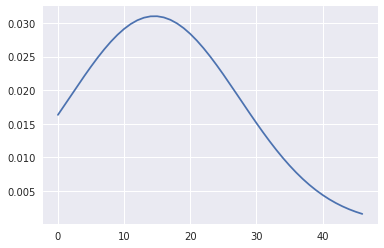

In [22]:
import scipy.stats as stats
import pylab as pl

h = list(temp_df['checkins'])
h.sort()
h = h[:-3000]
hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, hmean, hstd)
plt.plot(h, pdf) # including h here is crucial

In [23]:
def categorize(x):
    mean = 263.2143640350877
    std = 606.9478192185874
    if x <= mean - 2*std: return 1
    if x <= mean - std and x >= mean - 2*std: return 2
    if x >= mean - std and x <= mean + std: return 3
    if x >= mean + std and x <= mean + 2*std: return 4
    if x >= mean + 2*std: return 5

temp_df['label'] = temp_df['checkins'].apply(categorize)
print(temp_df.shape)

[len(temp_df[(temp_df['label'] == 1)]), len(temp_df[(temp_df['label'] == 2)]), len(temp_df[(temp_df['label'] == 3)]), len(temp_df[(temp_df['label'] == 4)]), len(temp_df[(temp_df['label'] == 5)])]

temp_df.columns

(5472, 18)


Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state', 'time', 'checkins',
       'label'],
      dtype='object')

In [24]:
temp_df.categories = temp_df.categories.str.lower().str.split(',')

In [81]:
temp_df2 = temp_df.filter(['categories','neighborhood','label'], axis=1)

# Get one hot encoding of columns B
one_hot = pd.get_dummies(temp_df2.categories.apply(pd.Series), prefix="categories", prefix_sep="_")
one_hot2 = pd.get_dummies(temp_df2.neighborhood.apply(pd.Series), prefix="neighborhood", prefix_sep="_")
# Drop column B as it is now encoded
temp_df2 = temp_df2.drop(['categories', 'neighborhood'],axis = 1)
# Join the encoded df
temp_df2 = temp_df2.join(one_hot)
temp_df2 = temp_df2.join(one_hot2)
temp_df2.shape

(5472, 1967)

In [82]:
len(temp_df2.columns)

y = np.ravel(pd.DataFrame(temp_df2["label"]))
X = temp_df2.drop('label', axis=1)
X.shape, y.shape

((5472, 1966), (5472,))

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [84]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9098173515981736
0.9232876712328767
